JUDUL 
Analisa Sentimen Masyarakat terhadap Wacana Periode Jabatan Presiden

Latar Belakang:
Akhir-akhir ini beberapa pejabat teras negara baik dari menteri, petinggi partai politik, maupun petinggi lembaga negara mengatakan bahwa rakyat puas terhadap pemerintahan saat ini. Pernyataan dukungan ini diklaim berasal dari BIG DATA yang dikumpulkan. Pada tugas ini, saya akan mengumpulkan cuitan masyarakat melalui twitter dan kumpulan berita yang berkembang mengenai topik periode jabatan presiden. Tujuan dari pengumpulan data ini untuk mengetahui bagaimana reaksi masyarakat terhadap wacana perpanjangan masa jabatan presiden.

Pengumpulan Data:
Data twitter diambil dengan kata kunci "periode jabatan" diambil sejak 4 April 2022 s.d. 9 April 2022, data ini berjumlah 1500 data twitter.
Data berita diambil dari judul yang dimunculkan Google News dengan kata kunci "periode jabatan" yang berjumlah 200 judul berita.

Pengerjaan Tugas dibagi menjadi beberapa bagian:
1. Instal library

A. PENGUMPULAN DATA
2. Scrapping Twitter
3. Menyimpan hasil scrapping no 2 pada dokumen .csv
4. Scrapping judul berita dari Google News menggunakan serpapi
5. Menyimpan hasil scrapping no 4 pada dokumen .csv

B. PRAPROSES DATA
6. Membuat fungsi praproses data teks
7. Praproses data twitter
8. Analisis distribusi jumlah kata untuk menentukan kata slang
9. Menghapus kata slang pada data twitter yang telah dibersihkan sebelumnya
10. Praproses data berita
11. Analisis distribusi jumlah kata untuk menentukan kata slang
12. Menghapus kata slang pada data berita yang telah dibersihkan sebelumnya

C. ANALISIS KUANTITATIF
13. Membuat fungsi analisis kuantitatif
14. Analisis kuantitatif pada data twitter
15. Analisis kuantitatif pada data berita

D. ANALISIS KUALITATIF
16. Sentimen Analisis
17. Ekstraksi Topik
18. Network


In [1]:
#1. INSTAL LIBRARY
import requests, json, tweepy, nltk, re, string, os
from bs4 import BeautifulSoup
from serpapi import GoogleSearch
import numpy as np
import matplotlib.pyplot as plt
from requests_oauthlib import OAuth1
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk import ngrams
from nltk.corpus import stopwords
from wordcloud import WordCloud
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import tqdm
import seaborn as sns
import networkx as nx

In [ ]:
#2. SCRAPPING DATA TWITTER
with open("token.json") as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

#SCRAP TWTITTER
keyword = "Periode jabatan -filter:retweet since:2022-04-04" #pengecualian konten RT 
response = tweepy.Cursor(api.search_tweets,
                         q = keyword,
                         lang = 'id',
                         tweet_mode="extended",
                         ).items(1500)
result = [tweet.full_text.strip() for tweet in response]
df_tweet = pd.DataFrame(result, columns=["tweet"])
df_tweet

In [ ]:
#3. Menyimpan hasil scrapping pada dokumen .csv
df_tweet.to_csv('twitter_periodejabatan.csv') #simpan hasil scrapping twitter ke .csv

In [ ]:
#4. Scrapping judul berita dari Google News menggunakan serpapi
params = {
    "engine": "google",
    "q": "periode jabatan",
    "tbm": "nws",
    "api_key": "1571bfad360285bcca4e5627b882cbaefda56aee9de0ac6c0ffca8dbaf725dc1",
}
search = GoogleSearch(params)
pages = search.pagination()

list_title = []
list_link = []
for result in pages:
    print(f"Current page: {result['serpapi_pagination']['current']}")
    for news_result in result["news_results"]:
        list_title.append(news_result['title'])
        list_link.append(news_result['link'])
df_news = pd.DataFrame(list(zip(list_title, list_link)),columns =['judul_berita', 'link_berita'])
df_news

https://serpapi.com/search
Current page: 1
https://serpapi.com/search
Current page: 3
https://serpapi.com/search
Current page: 4
https://serpapi.com/search
Current page: 5
https://serpapi.com/search
Current page: 6
https://serpapi.com/search
Current page: 7
https://serpapi.com/search
Current page: 8
https://serpapi.com/search
Current page: 9
https://serpapi.com/search
Current page: 10
https://serpapi.com/search
Current page: 11
https://serpapi.com/search
Current page: 12
https://serpapi.com/search
Current page: 13
https://serpapi.com/search
Current page: 14
https://serpapi.com/search
Current page: 15
https://serpapi.com/search
Current page: 16
https://serpapi.com/search
Current page: 17
https://serpapi.com/search
Current page: 18
https://serpapi.com/search
Current page: 19
https://serpapi.com/search
Current page: 20
https://serpapi.com/search
Current page: 21
https://serpapi.com/search


,judul_berita,link_berita
0,Saat Wiranto Beri Penjelasan Wacana Jabatan Pr...,https://nasional.kompas.com/read/2022/04/09/07...
1,Wiranto Ungkap 4 Alasan Presiden 3 Periode Tak...,https://news.detik.com/berita/d-6023593/wirant...
2,Ada 4 Alasan Mengapa Jabatan Jokowi 3 Periode ...,https://investor.id/national/290095/ada-4-alas...
3,Suara Penolakan Penundaan Pemilu dan Presiden ...,https://www.cnnindonesia.com/nasional/20220409...
4,Adian: 3 Menteri Bicara Perpanjang Jabatan Pre...,https://news.detik.com/berita/d-6023575/adian-...
...,...,...
195,"Soal Isu Jabatan Presiden 3 Periode, Sekjen Pe...",https://nasional.kompas.com/read/2021/09/02/18...
196,Sebut Masa Jabatan Presiden 2 Periode Kultur D...,https://www.suara.com/news/2022/03/09/140515/s...
197,Wacana Masa Jabatan 3 Periode dan Penundaan Pe...,https://www.tribunnews.com/nasional/2022/03/08...
198,BEM SI Gelar Unjuk Rasa Tolak Penundaan Pemilu...,https://megapolitan.kompas.com/read/2022/03/28...


In [ ]:
5. Menyimpan hasil scrapping no 4 pada dokumen .csv
df_news.to_csv('news_periodejabatan.csv') #simpan hasil scrapping google news ke .csv

In [3]:
#6. Membuat fungsi praproses data teks

#menghilangkan karakter yang tidak diperlukan, merubah menjadi huruf kecil
def case_folding(text):
    text = text.lower()
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z \t])|(\w+:\/\/\S+)|(\d+)", " ", text).split())
    text = re.sub(r"\d+","",text)
    text = text.translate(str.maketrans("","",string.punctuation))
    text = re.sub(r"\n","",text)
    text = re.sub(r"\t","",text)
    text = text.replace("  ", " ")
    return text

#menghilangkan kata yang tidak bermakna dalam kalimat
def remove_stopwords(text):
    sw_indonesia = stopwords.words("indonesian")
    list_negasi = ['tidak', 'lawan', 'belum', 'blm', 'tidak', 'tak', 'tdk', 'bukan', 'jangan']
    sw_indonesia = [word for word in sw_indonesia if word not in list_negasi]
    text = [word for word in text if word not in sw_indonesia]

    return (" ".join(text))

#menghilangkan bahasa slang
def slang_remover(data, slang_list):
    word_token = word_tokenize(data)
    word_list = []
    for word in word_token:
        for slang in slang_list:
            if word.lower() in slang[0].lower():
                word = slang[1]
                break
        word_list.append(word)
    return (" ".join(word_list))
    

In [4]:
#7. Praproses data twitter
df_tweet = pd.read_csv('twitter_periodejabatan.csv')
df_tweet["clean_tweet"] = df_tweet["tweet"].apply(lambda x: case_folding(x))
df_tweet["clean_tweet"] = df_tweet["clean_tweet"].apply(lambda x: word_tokenize(x))
df_tweet["clean_tweet"] = df_tweet["clean_tweet"].apply(lambda x: remove_stopwords(x))

In [5]:
# 8. Analisis distribusi jumlah kata untuk menentukan kata slang
def word_freq_dist (data):
    data = data.apply(lambda x: word_tokenize(str(x)))
    tweets = [word for tweet in data for word in tweet]
    freqdist = FreqDist(tweets)
    most_common_word = freqdist.most_common(100)
    return most_common_word, tweets

In [6]:
most_common_word = word_freq_dist(df_tweet['clean_tweet'])
print(most_common_word[0])

[('rt', 1217), ('periode', 1024), ('presiden', 946), ('jabatan', 867), ('perpanjangan', 686), ('tidak', 466), ('harga', 463), ('yg', 455), ('pajak', 450), ('jokowi', 385), ('ketua', 333), ('demo', 313), ('wacana', 300), ('wiranto', 285), ('isu', 249), ('umumkan', 227), ('sepi', 225), ('tolak', 209), ('pemilu', 196), ('wantimpres', 183), ('penundaan', 177), ('mahasiswa', 176), ('menteri', 166), ('partai', 162), ('bem', 151), ('moeldoko', 145), ('tak', 137), ('kontol', 136), ('dr', 128), ('nusantara', 116), ('melontarkan', 114), ('menjerumuskan', 112), ('sengaja', 111), ('bertujuan', 111), ('lin', 107), ('apr', 107), ('lia', 107), ('amp', 100), ('aksi', 93), ('nasional', 90), ('polemik', 87), ('angkat', 84), ('bikin', 81), ('konstitusi', 79), ('masyarakat', 73), ('emang', 73), ('banget', 69), ('topi', 67), ('seruan', 67), ('salah', 65), ('dgn', 64), ('istana', 61), ('bertemu', 61), ('ngomong', 59), ('uud', 55), ('jangan', 55), ('menolak', 51), ('dikaitkan', 50), ('bukan', 49), ('sdh', 48

Dari informasi frekuensi munculnya kata, dapat diperoleh bahwa slang word antara lain:

In [7]:
#9. Menghapus kata slang pada data twitter yang telah dibersihkan sebelumnya
slang_list= [
    ("yg", ""),
    ("rt", ""),
    ("dr", ""),
    ("tak", "tidak"),
    ("amp",""),
    ("dgn",""),
    ("sdh", "telah"),
    ("nya",""),
    ("tdk","tidak"),
    ("gak","tidak")]

df_tweet['clean_tweet'] = df_tweet['clean_tweet'].apply(lambda x:slang_remover(x,slang_list))
df_tweet.to_csv('clean_twitter_periodejabatan.csv')
df_tweet

,Unnamed: 0,tweet,clean_tweet
0,0,RT @YanHarahap: Ketum @PDemokrat ⁦@AgusYudhoyo...,ketum suara rakyat penundaan pemilu periode ...
1,1,RT @bs_vito: Ketua Wantimpres Wiranto menegask...,vito ketua wantimpres wiranto wacana perpanja...
2,2,RT @bs_vito: Ketua Wantimpres Wiranto menegask...,vito ketua wantimpres wiranto wacana perpanja...
3,3,RT @IriAnto77074950: Kita Angkat Topi Bagi Mah...,angkat topi mahasiswa seruan aksi nasional to...
4,4,RT @Sangkuriang5551: MELANGGAR SUMPAH JABATAN ...,melanggar sumpah jabatan resikonya pemakzulan...
...,...,...,...
1495,1495,RT @dragonb21395797: MAHASISWA &amp; RAKYAT AC...,mahasiswa rakyat aceh bergerak april tuntuta...
1496,1496,RT @5y4l0m: KSP @Dr_Moeldoko mengklaim kalau ...,ksp moeldoko mengklaim pemerintah tidak membi...
1497,1497,RT @anak_sultanjaya: Sudah cukup !!!\n\n Janga...,sultanjaya jangan berpolemik jabatan periode ...
1498,1498,RT @kiazanetta__: Sikap presiden Jokowi sudah ...,sikap presiden jokowi taat konstitusi setuju ...


In [8]:
#10. Praproses data berita
df_berita = pd.read_csv('news_periodejabatan.csv')
df_berita["clean_judul_berita"] = df_berita["judul_berita"].apply(lambda x: case_folding(x))
df_berita["clean_judul_berita"] = df_berita["clean_judul_berita"].apply(lambda x: word_tokenize(x))
df_berita["clean_judul_berita"] = df_berita["clean_judul_berita"].apply(lambda x: remove_stopwords(x))

In [9]:
#11. Analisis distribusi jumlah kata untuk menentukan kata slang
most_common_word = word_freq_dist(df_berita["clean_judul_berita"])
print(most_common_word[0])

[('periode', 148), ('jabatan', 143), ('presiden', 126), ('jokowi', 82), ('wacana', 39), ('tolak', 37), ('com', 28), ('perpanjangan', 28), ('kompas', 25), ('pemilu', 16), ('isu', 16), ('mahasiswa', 12), ('penundaan', 12), ('rakyat', 10), ('konstitusi', 9), ('diperpanjang', 8), ('usulan', 8), ('tidak', 7), ('pernyataan', 7), ('ahy', 7), ('apdesi', 7), ('pengamat', 7), ('pemerintah', 7), ('ketua', 7), ('ri', 7), ('alasan', 6), ('suara', 6), ('polemik', 6), ('perindo', 6), ('dukung', 6), ('pikiran', 6), ('pasang', 6), ('spanduk', 6), ('tak', 5), ('istana', 5), ('bicara', 5), ('demo', 5), ('desa', 5), ('tanggapi', 5), ('dpr', 5), ('dinilai', 5), ('dpd', 5), ('mpr', 5), ('penolakan', 4), ('deklarasi', 4), ('bem', 4), ('politisi', 4), ('pdip', 4), ('negara', 4), ('amandemen', 4), ('luhut', 4), ('news', 4), ('politik', 4), ('depok', 4), ('terkait', 4), ('bukan', 4), ('pakar', 4), ('sikap', 4), ('kobar', 4), ('perpanjang', 3), ('ksp', 3), ('nusantara', 3), ('kontra', 3), ('kepala', 3), ('rencan

In [10]:
#12. Menghapus kata slang pada data berita yang telah dibersihkan sebelumnya
#slang pada judul berita cenderung sedikit, karena judul berita biasanya mengikuti tata bahasa sesuai dengan EYD
slang_list= [
    ("com", ""),
    ("ri", ""),
    ("tak", "tidak")]

df_berita["clean_judul_berita"] = df_berita["clean_judul_berita"].apply(lambda x:slang_remover(x,slang_list))
df_berita.to_csv('clean_news_periodejabatan.csv')
df_berita

,Unnamed: 0,judul_berita,link_berita,clean_judul_berita
0,0,Saat Wiranto Beri Penjelasan Wacana Jabatan Pr...,https://nasional.kompas.com/read/2022/04/09/07...,wiranto penjelasan wacana jabatan presiden per...
1,1,Wiranto Ungkap 4 Alasan Presiden 3 Periode Tak...,https://news.detik.com/berita/d-6023593/wirant...,wiranto alasan presiden periode tidak
2,2,Ada 4 Alasan Mengapa Jabatan Jokowi 3 Periode ...,https://investor.id/national/290095/ada-4-alas...,alasan jabatan jokowi periode sulit
3,3,Suara Penolakan Penundaan Pemilu dan Presiden ...,https://www.cnnindonesia.com/nasional/20220409...,suara penolakan penundaan pemilu presiden peri...
4,4,Adian: 3 Menteri Bicara Perpanjang Jabatan Pre...,https://news.detik.com/berita/d-6023575/adian-...,adian menteri bicara perpanjang jabatan presid...
...,...,...,...,...
195,195,"Soal Isu Jabatan Presiden 3 Periode, Sekjen Pe...",https://nasional.kompas.com/read/2021/09/02/18...,isu jabatan presiden periode sekjen perindo jo...
196,196,Sebut Masa Jabatan Presiden 2 Periode Kultur D...,https://www.suara.com/news/2022/03/09/140515/s...,jabatan presiden periode kultur demokrasi sekj...
197,197,Wacana Masa Jabatan 3 Periode dan Penundaan Pe...,https://www.tribunnews.com/nasional/2022/03/08...,wacana jabatan periode penundaan pemilu mahfud...
198,198,BEM SI Gelar Unjuk Rasa Tolak Penundaan Pemilu...,https://megapolitan.kompas.com/read/2022/03/28...,bem si gelar unjuk tolak penundaan pemilu perp...


In [11]:
#13. Membuat fungsi analisis kuantitatif
def char_freq_dist(data):
    bins = np.arange(0,270,10)
    plot_1 =plt.figure(1)
    data.str.len().hist(bins=bins)
    plt.title("Distribusi Jumlah Huruf ")

def word_len_freq_dist(data):
    bin_range = np.arange(0,50)
    plot_2 =plt.figure(2)
    data.str.split().map(lambda x: len(x)).hist(bins=bin_range)
    plt.title("Distribusi Jumlah Kata")

def mean_word_freq_dist(data):
    plot_3 =plt.figure(3)
    data.str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
    plt.title("Distribusi Panjang Kata Rata-Rata")

def bigram_freq_dist(data):
    data_to_list = [word for news in data for word in news.split()]
    result = pd.Series(nltk.ngrams(data_to_list,2)).value_counts()[:20]
    return result


def wordcloud_visualization(data):
    wcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(data)
    plt.figure(figsize=(12,10))
    plt.imshow(wcloud, interpolation="bilinear")
    


(jabatan, presiden)        495
(perpanjangan, jabatan)    402
(tidak, perpanjangan)      264
(perpanjangan, periode)    238
(periode, demo)            229
(harga, harga)             227
(demo, sepi)               225
(sepi, harga)              225
(harga, pajak)             225
(pajak, pajak)             225
(umumkan, tidak)           225
(presiden, umumkan)        225
(presiden, periode)        214
(jabatan, periode)         196
(penundaan, pemilu)        174
(wantimpres, wiranto)      165
(ketua, wantimpres)        155
(ketua, partai)            147
(menteri, ketua)           142
(isu, periode)             120
dtype: int64


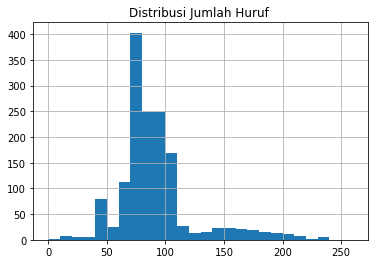

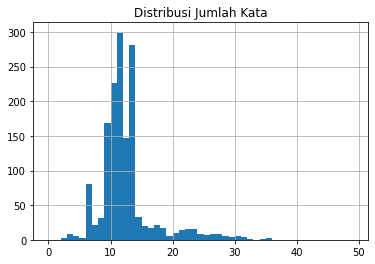

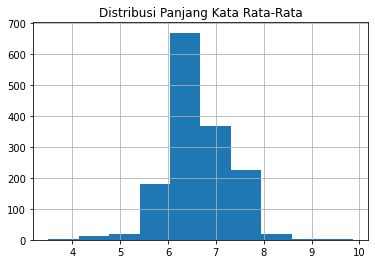

In [12]:
#14. Analisis kuantitatif pada data twitter
char_freq_dist(df_tweet["clean_tweet"])
word_len_freq_dist(df_tweet["clean_tweet"])
mean_word_freq_dist(df_tweet["clean_tweet"])
bigram = bigram_freq_dist(df_tweet["clean_tweet"])
print(bigram)
plt.show()

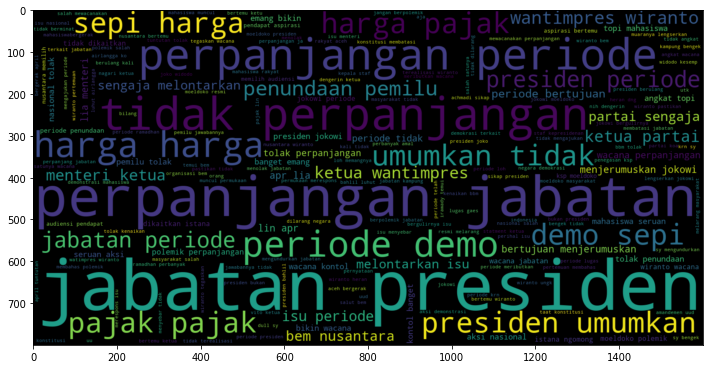

In [12]:
#Visualisasi Word Cloud
word_lis = [word for news in df_tweet["clean_tweet"] for word in news.split()]
wordcloud_visualization((" ".join(word_lis)))

HASIL ANALISIS KUANTITATIF DATA TWITTER DENGAN KATA KUNCI PERIODE JABATAN DARI TANGGAL 4 S.D. 9 APRIL 2022
Setelah data tweet dibersihkan kemudian dilakukan analisis kuantitatif, terdapat beberapa kesimpulan antara lain:
1. Distribusi jumlah huruf per tweet 40-110 huruf
2. Distribusi jumlah kata per tweet 6 - 14 kata yang artinya kebanyakan tweet adalah menyampaikan pendapat yang cukup panjang
3. Distribusi panjang kata rata-rata per tweet 6-8 kata per tweet
4. Pada analisis bigram dapat diketahui bahwa kata kunci "periode jabatan" erat kaitannya dengan periode jabatan presiden dan isu mengenai perpanjangan periode jabatan. Kata "tidak" dan "perpanjangan" cukup banyak. Pada data juga ditemukan cukup banyak kata "demo", hal ini dimungkinkan bahwa terjadi ketidaksepakatan untuk isu perpanjangan jabatan presiden dan ketidaksepakatan ini memunculkan demo.


(jabatan, presiden)        96
(presiden, periode)        69
(jokowi, periode)          39
(perpanjangan, jabatan)    28
(jabatan, periode)         14
(tolak, jabatan)           12
(jabatan, jokowi)          12
(periode, jabatan)         11
(penundaan, pemilu)        11
(wacana, jabatan)           9
(wacana, perpanjangan)      9
(periode, jokowi)           9
(presiden, jokowi)          9
(wacana, presiden)          8
(tolak, wacana)             8
(presiden, kompas)          8
(usulan, jabatan)           7
(wacana, jokowi)            6
(pikiran, rakyat)           6
(pemilu, perpanjangan)      5
dtype: int64


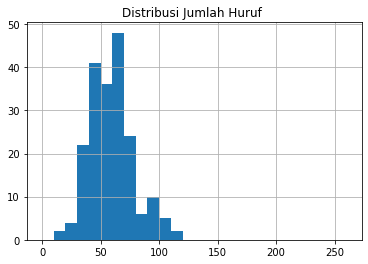

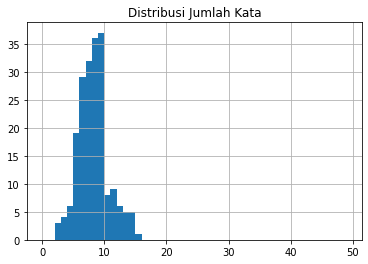

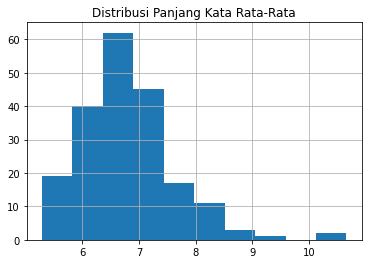

In [13]:
#15. Analisis kuantitatif pada data berita
char_freq_dist(df_berita["clean_judul_berita"])
word_len_freq_dist(df_berita["clean_judul_berita"])
mean_word_freq_dist(df_berita["clean_judul_berita"])
bigram = bigram_freq_dist(df_berita["clean_judul_berita"])
print(bigram)
plt.show()

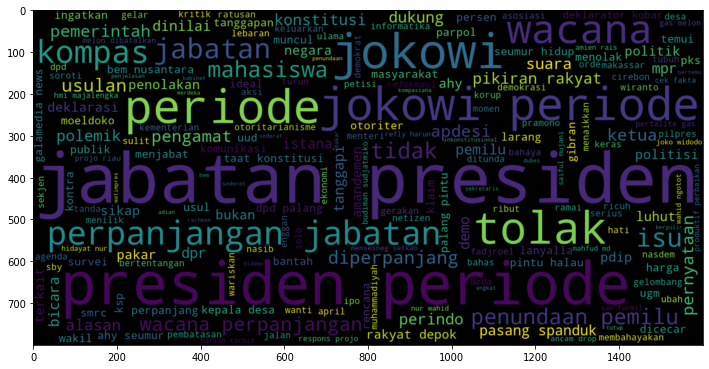

In [14]:
#Visualisasi Word Cloud
word_lis = [word for news in df_berita["clean_judul_berita"] for word in news.split()]
wordcloud_visualization((" ".join(word_lis)))

HASIL ANALISIS KUANTITATIF DATA JUDUL BERITA DENGAN KATA KUNCI PERIODE JABATAN DARI SUMBER DATA GOOGLE NEWS
Setelah data judul-judul berita dibersihkan kemudian dilakukan analisis kuantitatif, terdapat beberapa kesimpulan antara lain:
1. Distribusi jumlah huruf per judul 40-100 huruf hampir sama dengan distribusi jumlah huruf pada data twiter
2. Distribusi jumlah kata per judul 5-10 kata
3. Distribusi panjang kata rata-rata per judul 6-8 kata
4. Pada analisis bigram dapat diketahui bahwa kata kunci "periode jabatan" erat kaitannya dengan periode jabatan presiden dan isu mengenai perpanjangan periode jabatan. Kata "tolak jabatan" dan "tolak wacana" mengindikasikan sentimen negatif mengenai wacana perpanjangan jabatan. Berbeda dengan data twiter, pada data kata demo tidak muncul signifikan. 

In [ ]:
16. SENTIMEN ANALISIS 
Untuk memastikan asumsi bahwa kebanyakan sentimen negatif untuk data twitter dan berita maka dilakukan sentimen analisis. 
Sentimen analisis yang digunakan adalah Manual Polarization
a. mengambil dataset kata positif dan kata negatif dari file yang ada
b. fungsi perhitungan  kata negatif dan positif pada dataset
c. penentuan sentimen analisis pada setiap tweet
d. fungsi mengetahui analisis deskriptif data sentimen dan visualisasinya
e. mengetahui analisis deskriptif data sentimen twitter dan visualisasi
f. penentuan sentimen analisis pada setiap judul berita
g. mengetahui analisis deskriptif data sentimen berita dan visualisasi

Hasil dari analisis sentimen pada kedua dataset baik yang bersumber dari twiter maupun dari judul berita:
dapat diketahui bahwa sentimen terhadap wacana periode jabatan presiden, di mana saat ini yang isu yang berkembang adalah perpanjangan masa jabatan,
dinilai tidak didukung oleh masyarakat. Sentimen negatif pada twiter memiliki nilai rata-rata -1.8 sedangkan pada data berita -0.4

In [57]:
#a. mengambil dataset kata positif dan kata negatif dari file yang ada
with open("./kata_positif.txt","r") as positif_file :
  positive_words = list(set(positif_file.readlines()))
with open("./kata_negatif.txt","r") as negative_file :
  negative_words = list(set(negative_file.readlines()))

In [58]:
#b. fungsi perhitungan  kata negatif dan positif pada dataset
def sentiment_analysis(data):
  tweets = [tweet for tweet in data]
  list_negasi = ['tidak', 'lawan', 'belum', 'blm', 'tidak', 'tak', 'tdk', 'bukan', 'jangan']
  hasil = []
  for tweet in tweets:
      tweet_clean = tweet.strip().split()
      count_p = 0
      count_n = 0
      
      good_count = 0 #nilai positif
      bad_count = 0 #nilai negatif

      for good_word in positive_words:
          count = tweet_clean.count(good_word.strip().lower())
          if count > 0:
            good_count += count

      for bad_word in negative_words:
          count = tweet_clean.count(bad_word.strip().lower())
          if count > 0:
            bad_count += count
      
      for negasi_word in list_negasi:
          count = tweet_clean.count(negasi_word.strip().lower())
          if count > 0:
            bad_count += count
      
      hasil.append(good_count - bad_count)
  return hasil

In [59]:
#c. penentuan sentimen analisis pada setiap tweet
hasil = sentiment_analysis(df_tweet["clean_tweet"])
sentiments = ["positif" if sentimen > 0 else ("netral" if sentimen == 0 else "negatif") for sentimen in hasil]
df_tweet["sentiment"] = sentiments
df_tweet.to_csv('sentiment_twiter_periodejabatan.csv')
df_tweet

,Unnamed: 0,tweet,clean_tweet,sentiment
0,0,RT @YanHarahap: Ketum @PDemokrat ⁦@AgusYudhoyo...,ketum suara rakyat penundaan pemilu periode ...,negatif
1,1,RT @bs_vito: Ketua Wantimpres Wiranto menegask...,vito ketua wantimpres wiranto wacana perpanja...,negatif
2,2,RT @bs_vito: Ketua Wantimpres Wiranto menegask...,vito ketua wantimpres wiranto wacana perpanja...,negatif
3,3,RT @IriAnto77074950: Kita Angkat Topi Bagi Mah...,angkat topi mahasiswa seruan aksi nasional to...,negatif
4,4,RT @Sangkuriang5551: MELANGGAR SUMPAH JABATAN ...,melanggar sumpah jabatan resikonya pemakzulan...,negatif
...,...,...,...,...
1495,1495,RT @dragonb21395797: MAHASISWA &amp; RAKYAT AC...,mahasiswa rakyat aceh bergerak april tuntuta...,negatif
1496,1496,RT @5y4l0m: KSP @Dr_Moeldoko mengklaim kalau ...,ksp moeldoko mengklaim pemerintah tidak membi...,negatif
1497,1497,RT @anak_sultanjaya: Sudah cukup !!!\n\n Janga...,sultanjaya jangan berpolemik jabatan periode ...,negatif
1498,1498,RT @kiazanetta__: Sikap presiden Jokowi sudah ...,sikap presiden jokowi taat konstitusi setuju ...,positif


In [60]:
#d. fungsi mengetahui analisa deskriptif data sentimen dan visualisasinya
def descriptive_visual(hasil):
    print (f'''
    Mean: {np.mean(hasil)}
    Median: {np.median(hasil)}
    quartil awal: {np.quantile(hasil,0.25)}
    quartil akhir: {np.quantile(hasil,0.75)}
    Standar deviasi: {np.std(hasil)}     
    ''')
    labels, counts = np.unique(hasil, return_counts=True)

    fig, ax = plt.subplots()
    ax.set_xticks(ax.get_xticks())

    sns.barplot(x = list(labels), 
                y = list(counts))

    sns.lineplot(x = ax.get_xticks(), 
                y = list(counts))

    plt.title(f'Distribution Sentiment')
    plt.xlabel('Labels')
    plt.ylabel('Counts')

    plt.show()


    Mean: -1.836
    Median: -2.0
    quartil awal: -3.0
    quartil akhir: -1.0
    Standar deviasi: 1.4997013035934856     
    


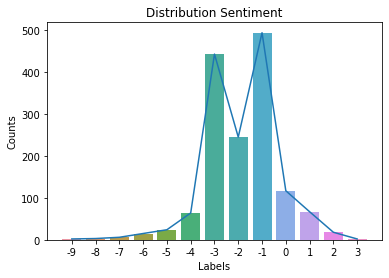

In [61]:
#e. mengetahui analisis deskriptif data sentimen twitter dan visualisasi
descriptive_visual(hasil)

In [62]:
#f. penentuan sentimen analisis pada setiap judul berita
hasil = sentiment_analysis(df_berita["clean_judul_berita"])
sentiments = ["positif" if sentimen > 0 else ("netral" if sentimen == 0 else "negatif") for sentimen in hasil]
df_berita["sentiment"] = sentiments
df_berita.to_csv('sentiment_berita_periodejabatan.csv')
df_berita

,Unnamed: 0,judul_berita,link_berita,clean_judul_berita,sentiment
0,0,Saat Wiranto Beri Penjelasan Wacana Jabatan Pr...,https://nasional.kompas.com/read/2022/04/09/07...,wiranto penjelasan wacana jabatan presiden per...,negatif
1,1,Wiranto Ungkap 4 Alasan Presiden 3 Periode Tak...,https://news.detik.com/berita/d-6023593/wirant...,wiranto alasan presiden periode tidak,negatif
2,2,Ada 4 Alasan Mengapa Jabatan Jokowi 3 Periode ...,https://investor.id/national/290095/ada-4-alas...,alasan jabatan jokowi periode sulit,negatif
3,3,Suara Penolakan Penundaan Pemilu dan Presiden ...,https://www.cnnindonesia.com/nasional/20220409...,suara penolakan penundaan pemilu presiden peri...,negatif
4,4,Adian: 3 Menteri Bicara Perpanjang Jabatan Pre...,https://news.detik.com/berita/d-6023575/adian-...,adian menteri bicara perpanjang jabatan presid...,netral
...,...,...,...,...,...
195,195,"Soal Isu Jabatan Presiden 3 Periode, Sekjen Pe...",https://nasional.kompas.com/read/2021/09/02/18...,isu jabatan presiden periode sekjen perindo jo...,netral
196,196,Sebut Masa Jabatan Presiden 2 Periode Kultur D...,https://www.suara.com/news/2022/03/09/140515/s...,jabatan presiden periode kultur demokrasi sekj...,netral
197,197,Wacana Masa Jabatan 3 Periode dan Penundaan Pe...,https://www.tribunnews.com/nasional/2022/03/08...,wacana jabatan periode penundaan pemilu mahfud...,negatif
198,198,BEM SI Gelar Unjuk Rasa Tolak Penundaan Pemilu...,https://megapolitan.kompas.com/read/2022/03/28...,bem si gelar unjuk tolak penundaan pemilu perp...,negatif



    Mean: -0.435
    Median: 0.0
    quartil awal: -1.0
    quartil akhir: 0.0
    Standar deviasi: 0.886439507242316     
    


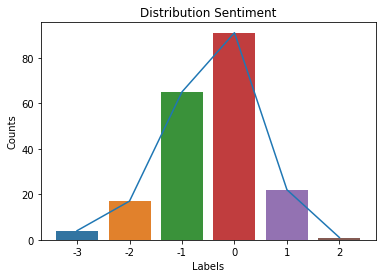

In [63]:
#g. mengetahui analisis deskriptif data sentimen berita dan visualisasi
descriptive_visual(hasil)

Dari statistika deskriptif data set sentimen twiter dapat diketahui bahwa data twiter untuk kata kunci periode jabatan rata-rata bernilai negatif. 
Sehingga dapat disimpulkan bahwa isu periode jabatan pada saat 4-9 April 2022 direspon negatif oleh masyarakat melalui twitter.
Sedangkan pada data berita, dapat diketahui bahwa rata-rata sentimen negatif, namun tidak setinggi pada data twiter. Judul berita netral juga banyak ditemukan dalam dataset.

17. EKSTRAKSI TOPIK
Pada bagian ini, akan dicari beberapa topik yang muncul yang berkaitan dengan kata kunci "periode jabatan" pada dataset judul berita
17.a. Fungsi LDA MODEL
17.b. Fungsi TUNING PARAMETER
17.c. Menyiapkan data
17.d. Memanggil fungsi tuning parameter
17.e. Menentukan jumlah topik 
17.f. Menentukan paramater alpha dan betha berdasarkan jumlah topik terbaik dengan nilai koheren tertinggi
17.g. Ektraksi topik


In [9]:
#17. a. Fungsi LDA MODEL
def ldamodel(ntopics, alph, beta, doc_term_matrix, dictionary):
    lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=ntopics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alph,
                                           eta=beta)
    return lda_model

TUNING PARAMETER LDA
fungsi menghitung nilai korehen
17.b. Fungsi TUNING PARAMETER

In [32]:
#fungsi menghitung nilai korehen
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_berita, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [41]:
#17.b. Fungsi TUNING PARAMETER
def get_tuning_param(doc_term_matrix, namafile):
    min_topics = 2
    max_topics = 8
    step_size = 1
    topics_range = range(min_topics, max_topics, step_size)
    # Alpha parameter
    alpha = list(np.arange(0.01, 1, 0.3))
    alpha.append('symmetric')
    alpha.append('asymmetric')
    # Beta parameter
    beta = list(np.arange(0.01, 1, 0.3))
    beta.append('symmetric')
    # Validation sets
    num_of_docs = len(doc_term_matrix)
    corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
                # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
                gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.75), 
                doc_term_matrix]
    corpus_title = ['75% Corpus', '100% Corpus']
    model_results = {'Validation_Set': [],
                    'Topics': [],
                    'Alpha': [],
                    'Beta': [],
                    'Coherence': []
                    }
    # Can take a long time to run
    if 1 == 1:
        pbar = tqdm.tqdm(total=540)
        
        # iterate through validation corpuses
        for i in range(len(corpus_sets)):
            # iterate through number of topics
            for k in topics_range:
                # iterate through alpha values
                for a in alpha:
                    # iterare through beta values
                    for b in beta:
                        # get the coherence score for the given parameters
                        cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                    k=k, a=a, b=b)
                        # Save the model results
                        model_results['Validation_Set'].append(corpus_title[i])
                        model_results['Topics'].append(k)
                        model_results['Alpha'].append(a)
                        model_results['Beta'].append(b)
                        model_results['Coherence'].append(cv)
                        
                        pbar.update(1)
        pd.DataFrame(model_results).to_csv(namafile, index=False)
        pbar.close()

 

In [42]:
#TUNING PARAMETER
#17.c. Menyiapkan data twitter

data_berita = [berita.split() for berita in df_tweet["clean_tweet"]]
dictionary = corpora.Dictionary(data_berita)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_berita]

In [ ]:
#17.d. Memanggil fungsi tuning parameter
get_tuning_param(doc_term_matrix,"tuning_lda_twiter.csv")
df_tuning_twiter = pd.read_csv("tuning_lda_twiter.csv")
df_tuning_twiter

<AxesSubplot:xlabel='Topics'>

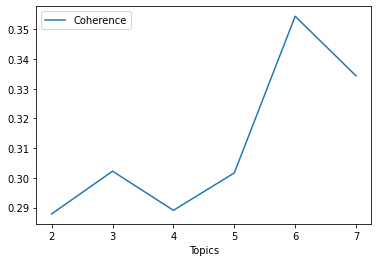

In [44]:
#17.e. Menentukan jumlah topik 
df_plot = df_tuning_twiter[(df_tuning_twiter.Alpha == "0.01") & (df_tuning_twiter.Beta == "0.31") & (df_tuning_twiter.Validation_Set == "100% Corpus")].copy()
df_plot.plot(x='Topics', y = "Coherence", kind="line")

In [45]:
#17.f. Menentukan paramater alpha dan betha berdasarkan jumlah topik terbaik dengan nilai koheren tertinggi

df_plot_2 = df_tuning_twiter[(df_tuning_twiter.Topics == 6) & (df_tuning_twiter.Validation_Set == "100% Corpus")].copy()
df_plot_2.sort_values(by="Coherence", ascending=False)

,Validation_Set,Topics,Alpha,Beta,Coherence
321,100% Corpus,6,symmetric,0.31,0.356938
301,100% Corpus,6,0.01,0.31,0.354383
324,100% Corpus,6,symmetric,symmetric,0.349405
322,100% Corpus,6,symmetric,0.61,0.345123
314,100% Corpus,6,0.61,symmetric,0.342843
303,100% Corpus,6,0.01,0.9099999999999999,0.339991
302,100% Corpus,6,0.01,0.61,0.339306
310,100% Corpus,6,0.61,0.01,0.337081
318,100% Corpus,6,0.9099999999999999,0.9099999999999999,0.337006
309,100% Corpus,6,0.31,symmetric,0.336043


In [46]:
#17.g. Ektraksi topik
n = 6
a = 0.01
b = 0.3
lda = ldamodel(n,a,b,doc_term_matrix, dictionary)

from pprint import pprint
pprint(lda.print_topics())

[(0,
  '0.052*"jokowi" + 0.051*"periode" + 0.049*"isu" + 0.043*"menteri" + '
  '0.041*"partai" + 0.041*"ketua" + 0.030*"melontarkan" + '
  '0.029*"menjerumuskan" + 0.029*"bertujuan" + 0.029*"sengaja"'),
 (1,
  '0.049*"kontol" + 0.039*"jabatan" + 0.038*"periode" + 0.034*"perpanjangan" + '
  '0.033*"wacana" + 0.031*"polemik" + 0.031*"tidak" + 0.029*"presiden" + '
  '0.028*"bikin" + 0.026*"emang"'),
 (2,
  '0.074*"wiranto" + 0.060*"jabatan" + 0.049*"wantimpres" + 0.048*"tidak" + '
  '0.045*"ketua" + 0.044*"periode" + 0.043*"presiden" + 0.035*"wacana" + '
  '0.030*"bem" + 0.027*"perpanjangan"'),
 (3,
  '0.057*"periode" + 0.051*"jabatan" + 0.036*"tidak" + 0.029*"presiden" + '
  '0.028*"jokowi" + 0.020*"uud" + 0.016*"konstitusi" + 0.015*"wacana" + '
  '0.010*"narasi" + 0.010*"pemilu"'),
 (4,
  '0.070*"presiden" + 0.067*"jabatan" + 0.049*"perpanjangan" + 0.048*"tolak" + '
  '0.034*"mahasiswa" + 0.033*"pemilu" + 0.030*"penundaan" + 0.029*"periode" + '
  '0.021*"aksi" + 0.020*"nasional"'),
 (5,

TOPIK YANG BERHASIL DIEKSTRAKSI MENGENAI PERIODE JABATAN DATA TWITER
1. Isu periode jabatan dikeluarkan oleh menteri atau ketua partai
2. Isu periode jabatan membuat polemik
3. Isu periode jabatan direspon oleh beberapa pihak, antara lain wiranto, watimpres, bem
4. Isu periode jabatan berkaitan erat pemilu dan konsitusi UUD
5. Isu ini direpon oleh mahasiswa dengan membuat aksi nasional menolak perpanjangan periode jabatan
6. Isu ini berkaitan dengan pajak, harga.

In [7]:
#TUNING PARAMETER
#17.c. Menyiapkan data berita
df_berita = pd.read_csv("clean_news_periodejabatan.csv")
data_berita = [berita.split() for berita in df_berita["clean_judul_berita"]]
dictionary = corpora.Dictionary(data_berita)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_berita]

In [48]:
#17.d. Memanggil fungsi tuning parameter
get_tuning_param(doc_term_matrix,"tuning_lda_berita.csv")
df_tuning_berita = pd.read_csv("tuning_lda_berita.csv")
df_tuning_berita





































































































































































  0%|          | 0/540 [3:34:26<?, ?it/s]




























































































































































































































































































































































































































































































































































































































































































































































































































,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.430730
1,75% Corpus,2,0.01,0.31,0.431349
2,75% Corpus,2,0.01,0.61,0.413696
3,75% Corpus,2,0.01,0.9099999999999999,0.439296
4,75% Corpus,2,0.01,symmetric,0.409634
...,...,...,...,...,...
355,100% Corpus,7,asymmetric,0.01,0.384675
356,100% Corpus,7,asymmetric,0.31,0.394752
357,100% Corpus,7,asymmetric,0.61,0.373877
358,100% Corpus,7,asymmetric,0.9099999999999999,0.378473


In [3]:
df_tuning_berita = pd.read_csv("tuning_lda_berita.csv")
df_tuning_berita

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.430730
1,75% Corpus,2,0.01,0.31,0.431349
2,75% Corpus,2,0.01,0.61,0.413696
3,75% Corpus,2,0.01,0.9099999999999999,0.439296
4,75% Corpus,2,0.01,symmetric,0.409634
...,...,...,...,...,...
355,100% Corpus,7,asymmetric,0.01,0.384675
356,100% Corpus,7,asymmetric,0.31,0.394752
357,100% Corpus,7,asymmetric,0.61,0.373877
358,100% Corpus,7,asymmetric,0.9099999999999999,0.378473


<AxesSubplot:xlabel='Topics'>

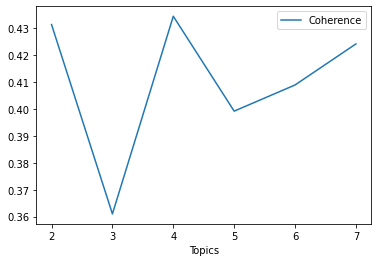

In [4]:
#17.e. Menentukan jumlah topik 
df_plot = df_tuning_berita[(df_tuning_berita.Alpha == "0.01") & (df_tuning_berita.Beta == "0.31") & (df_tuning_berita.Validation_Set == "100% Corpus")].copy()
df_plot.plot(x='Topics', y = "Coherence", kind="line")

Jumlah topik 4

In [10]:
#17.g. Ektraksi topik
n = 4
a = 0.01
b = 0.3
lda = ldamodel(n,a,b,doc_term_matrix, dictionary)

from pprint import pprint
pprint(lda.print_topics())

[(0,
  '0.053*"periode" + 0.034*"jabatan" + 0.033*"presiden" + 0.022*"pemilu" + '
  '0.021*"jokowi" + 0.017*"wacana" + 0.016*"penundaan" + 0.011*"perindo" + '
  '0.011*"pemerintah" + 0.011*"penolakan"'),
 (1,
  '0.043*"jabatan" + 0.042*"periode" + 0.033*"presiden" + 0.023*"rakyat" + '
  '0.023*"jokowi" + 0.015*"pikiran" + 0.014*"polemik" + 0.012*"usulan" + '
  '0.012*"dpr" + 0.012*"depok"'),
 (2,
  '0.096*"jabatan" + 0.086*"periode" + 0.085*"presiden" + 0.046*"jokowi" + '
  '0.030*"tolak" + 0.019*"perpanjangan" + 0.017*"wacana" + 0.016*"kompas" + '
  '0.012*"mahasiswa" + 0.010*"isu"'),
 (3,
  '0.068*"periode" + 0.049*"jokowi" + 0.047*"jabatan" + 0.045*"presiden" + '
  '0.038*"wacana" + 0.017*"perpanjangan" + 0.017*"kompas" + 0.015*"tidak" + '
  '0.010*"apdesi" + 0.010*"tolak"')]


TOPIK YANG BERHASIL DIEKSTRAKSI MENGENAI PERIODE JABATAN DATA BERITA
1. pendapat dari Perindo mengenai wacana perpenjangan periode jabatan
2. Usulan perpanjangan jabatan membuat polemik di masyarakat
3. Mahasiswa menolak perpanjangan periode
4. Apdesi menolak wacana perpanjangan

NETWORK

In [10]:
#fungsi menggambar network
def draw_networkd(data, header):
    tweet_gram = [word for tweet in data[header] for word in tweet.split()]
    fdist = nltk.FreqDist(nltk.ngrams(tweet_gram, 2))
    list_data = [[k,v]for k,v in fdist.items()]
    df_bigram = pd.DataFrame(list_data, columns=['bigram', 'count'])
    df_bigram_sort = df_bigram.sort_values(by=["count"], ascending=False).copy().reset_index(drop=True)[:1642]
    d = df_bigram_sort.set_index("bigram").T.to_dict("records")
    G = nx.Graph()

    nodes_size = []
    for k,v in d[0].items():
        G.add_edge(k[0], k[1], weight=(v*10))
    deg_filter= G.degree()
    
    items_filter = [n for n in deg_filter if n[1] > 10]

    node = [node[0] for node in items_filter]
    degree = [node[1]*20 for node in items_filter]

    fig, ax = plt.subplots(figsize=(50, 50))
    pos = nx.spring_layout(G, k=1.5)
    k = G.subgraph(node)
    # Plot networks
    nx.draw_networkx(
        k, 
        pos=pos,
        font_size=14,
        font_color='white',
        width=1,
        edge_color='grey',
        node_color='purple',
        node_size = degree,
        with_labels= False,
        ax=ax
        )
    # Create offset labels
    for key, value in pos.items():
        if key in node:
            x, y = value[0]+.005, value[1]+.005
            ax.text(x, y,
                s=key,
                bbox=dict(facecolor='grey', alpha=0.25),
                horizontalalignment='center', fontsize=16)

    plt.show()


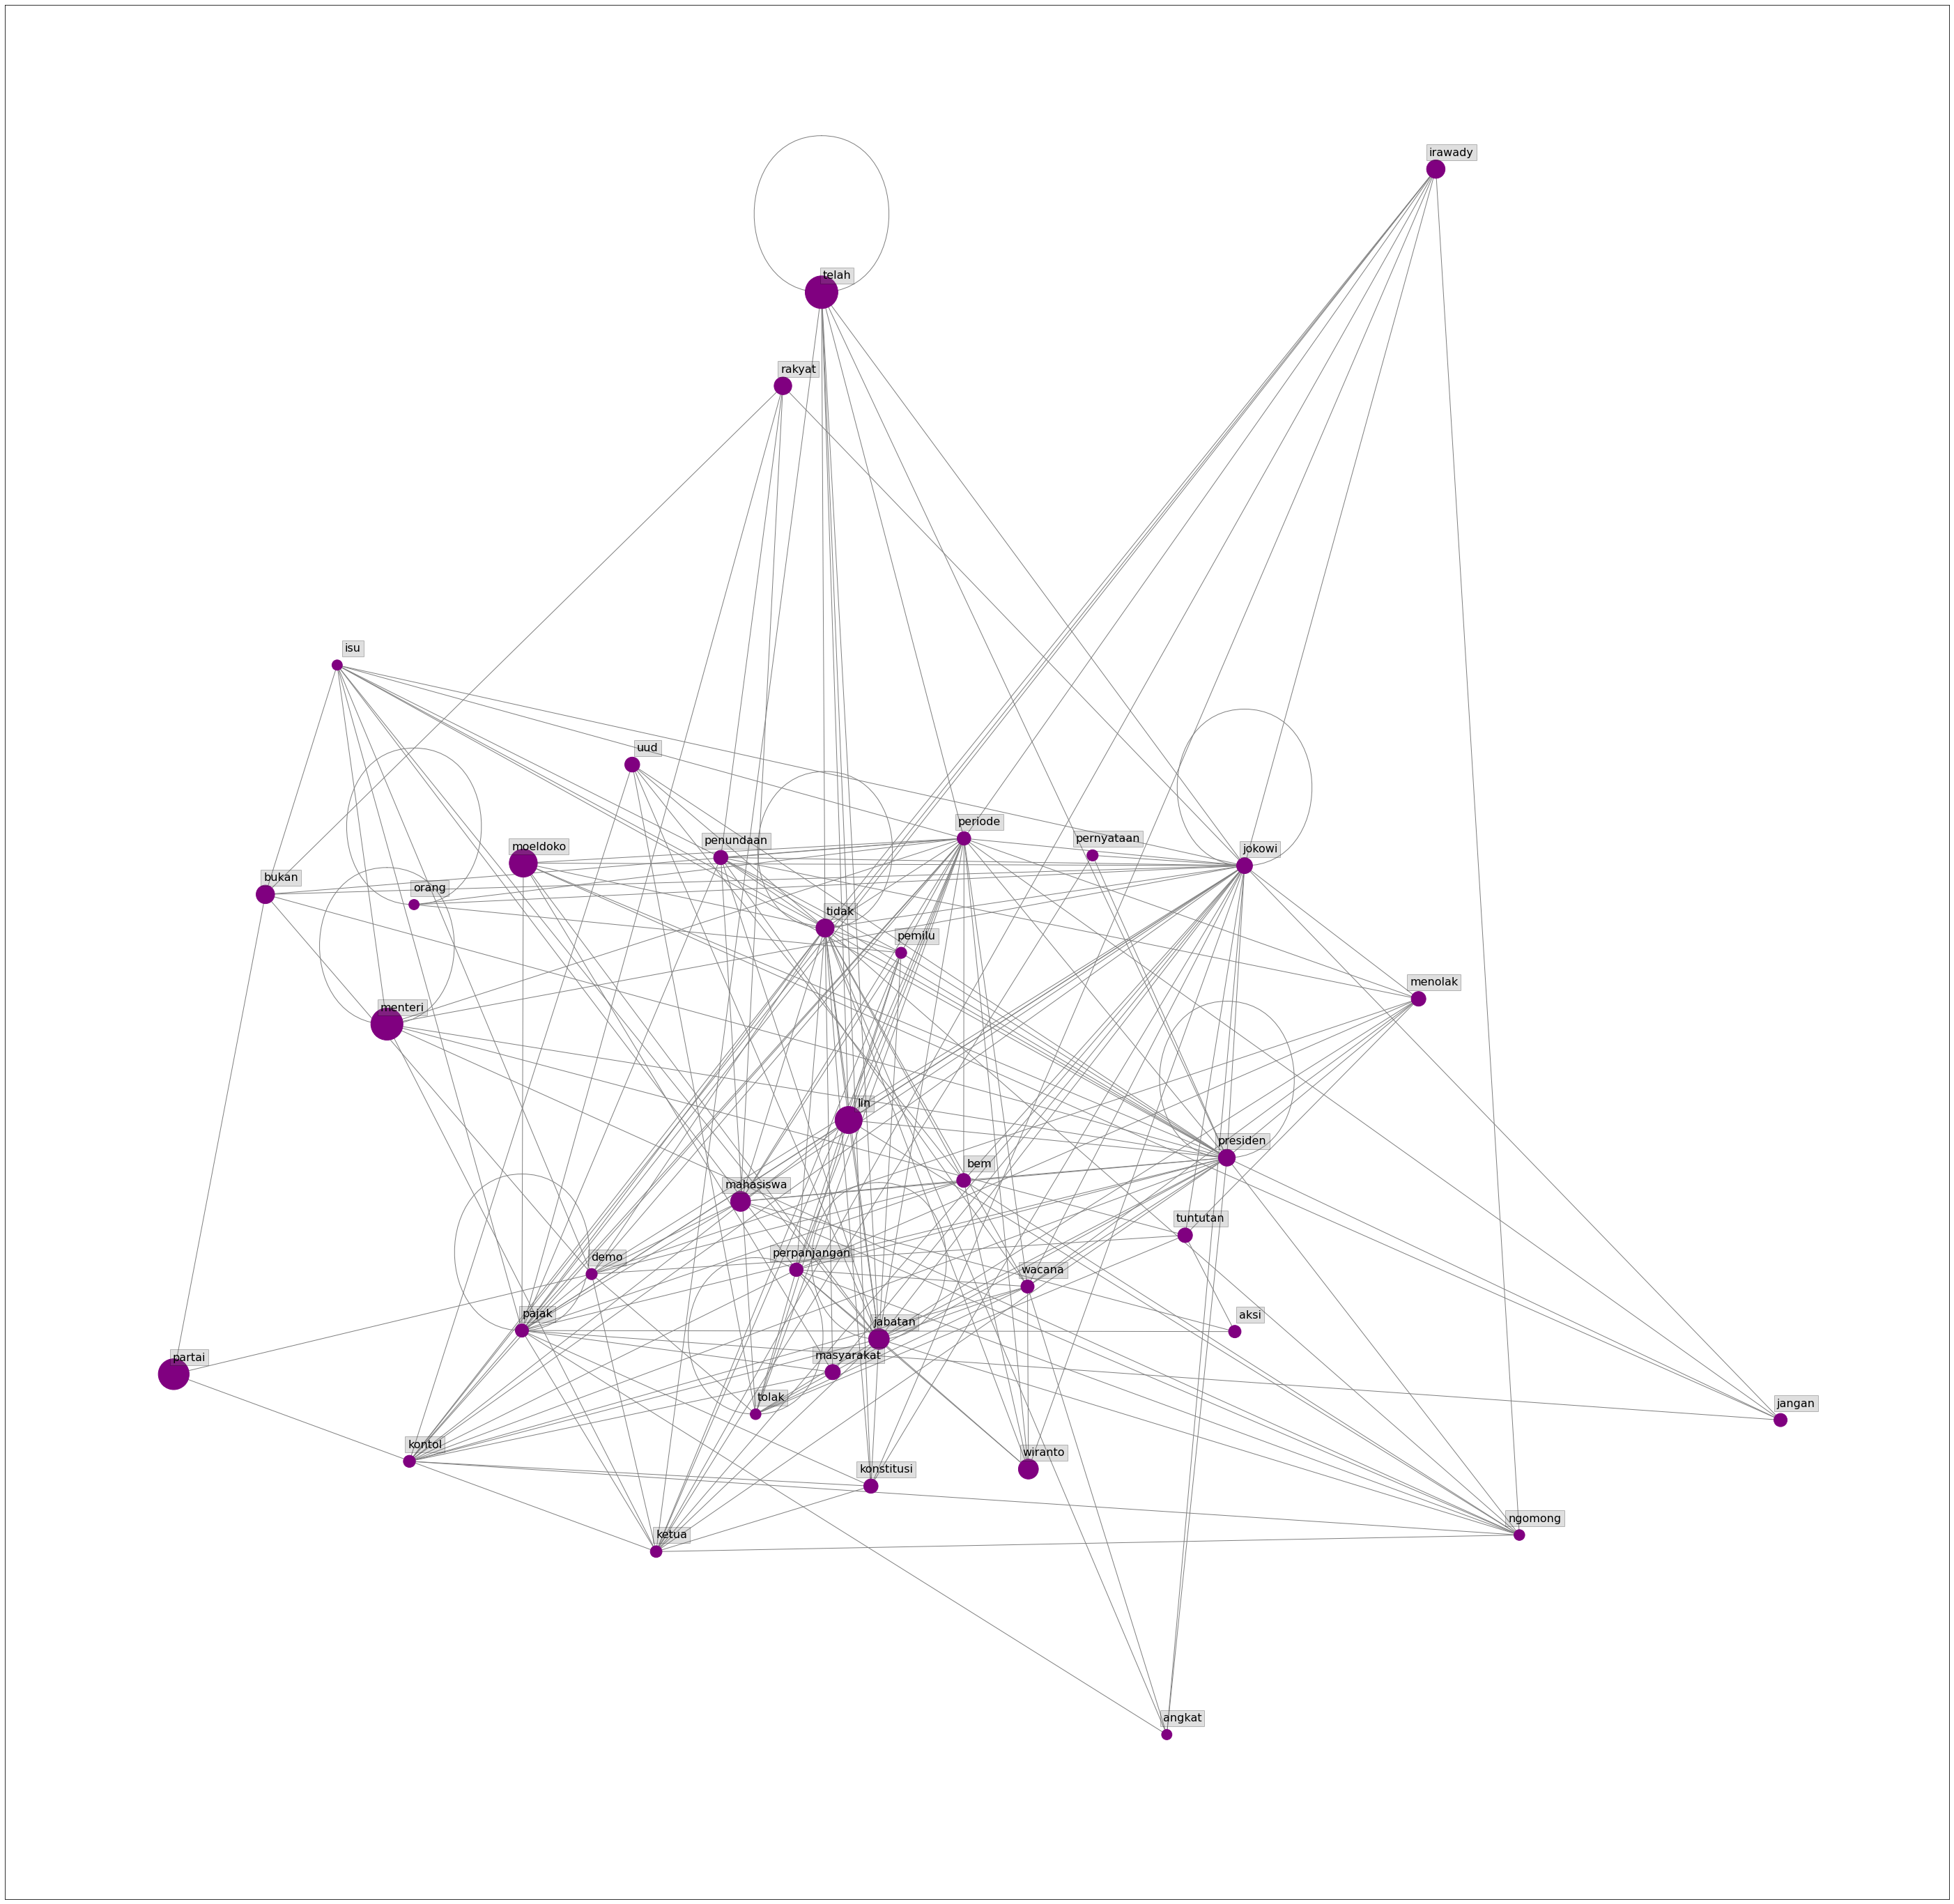

In [11]:
#Memanggil Fungsi Membuat Network Twitter
df = pd.read_csv("clean_twitter_periodejabatan.csv")
draw_networkd(df,"clean_tweet")

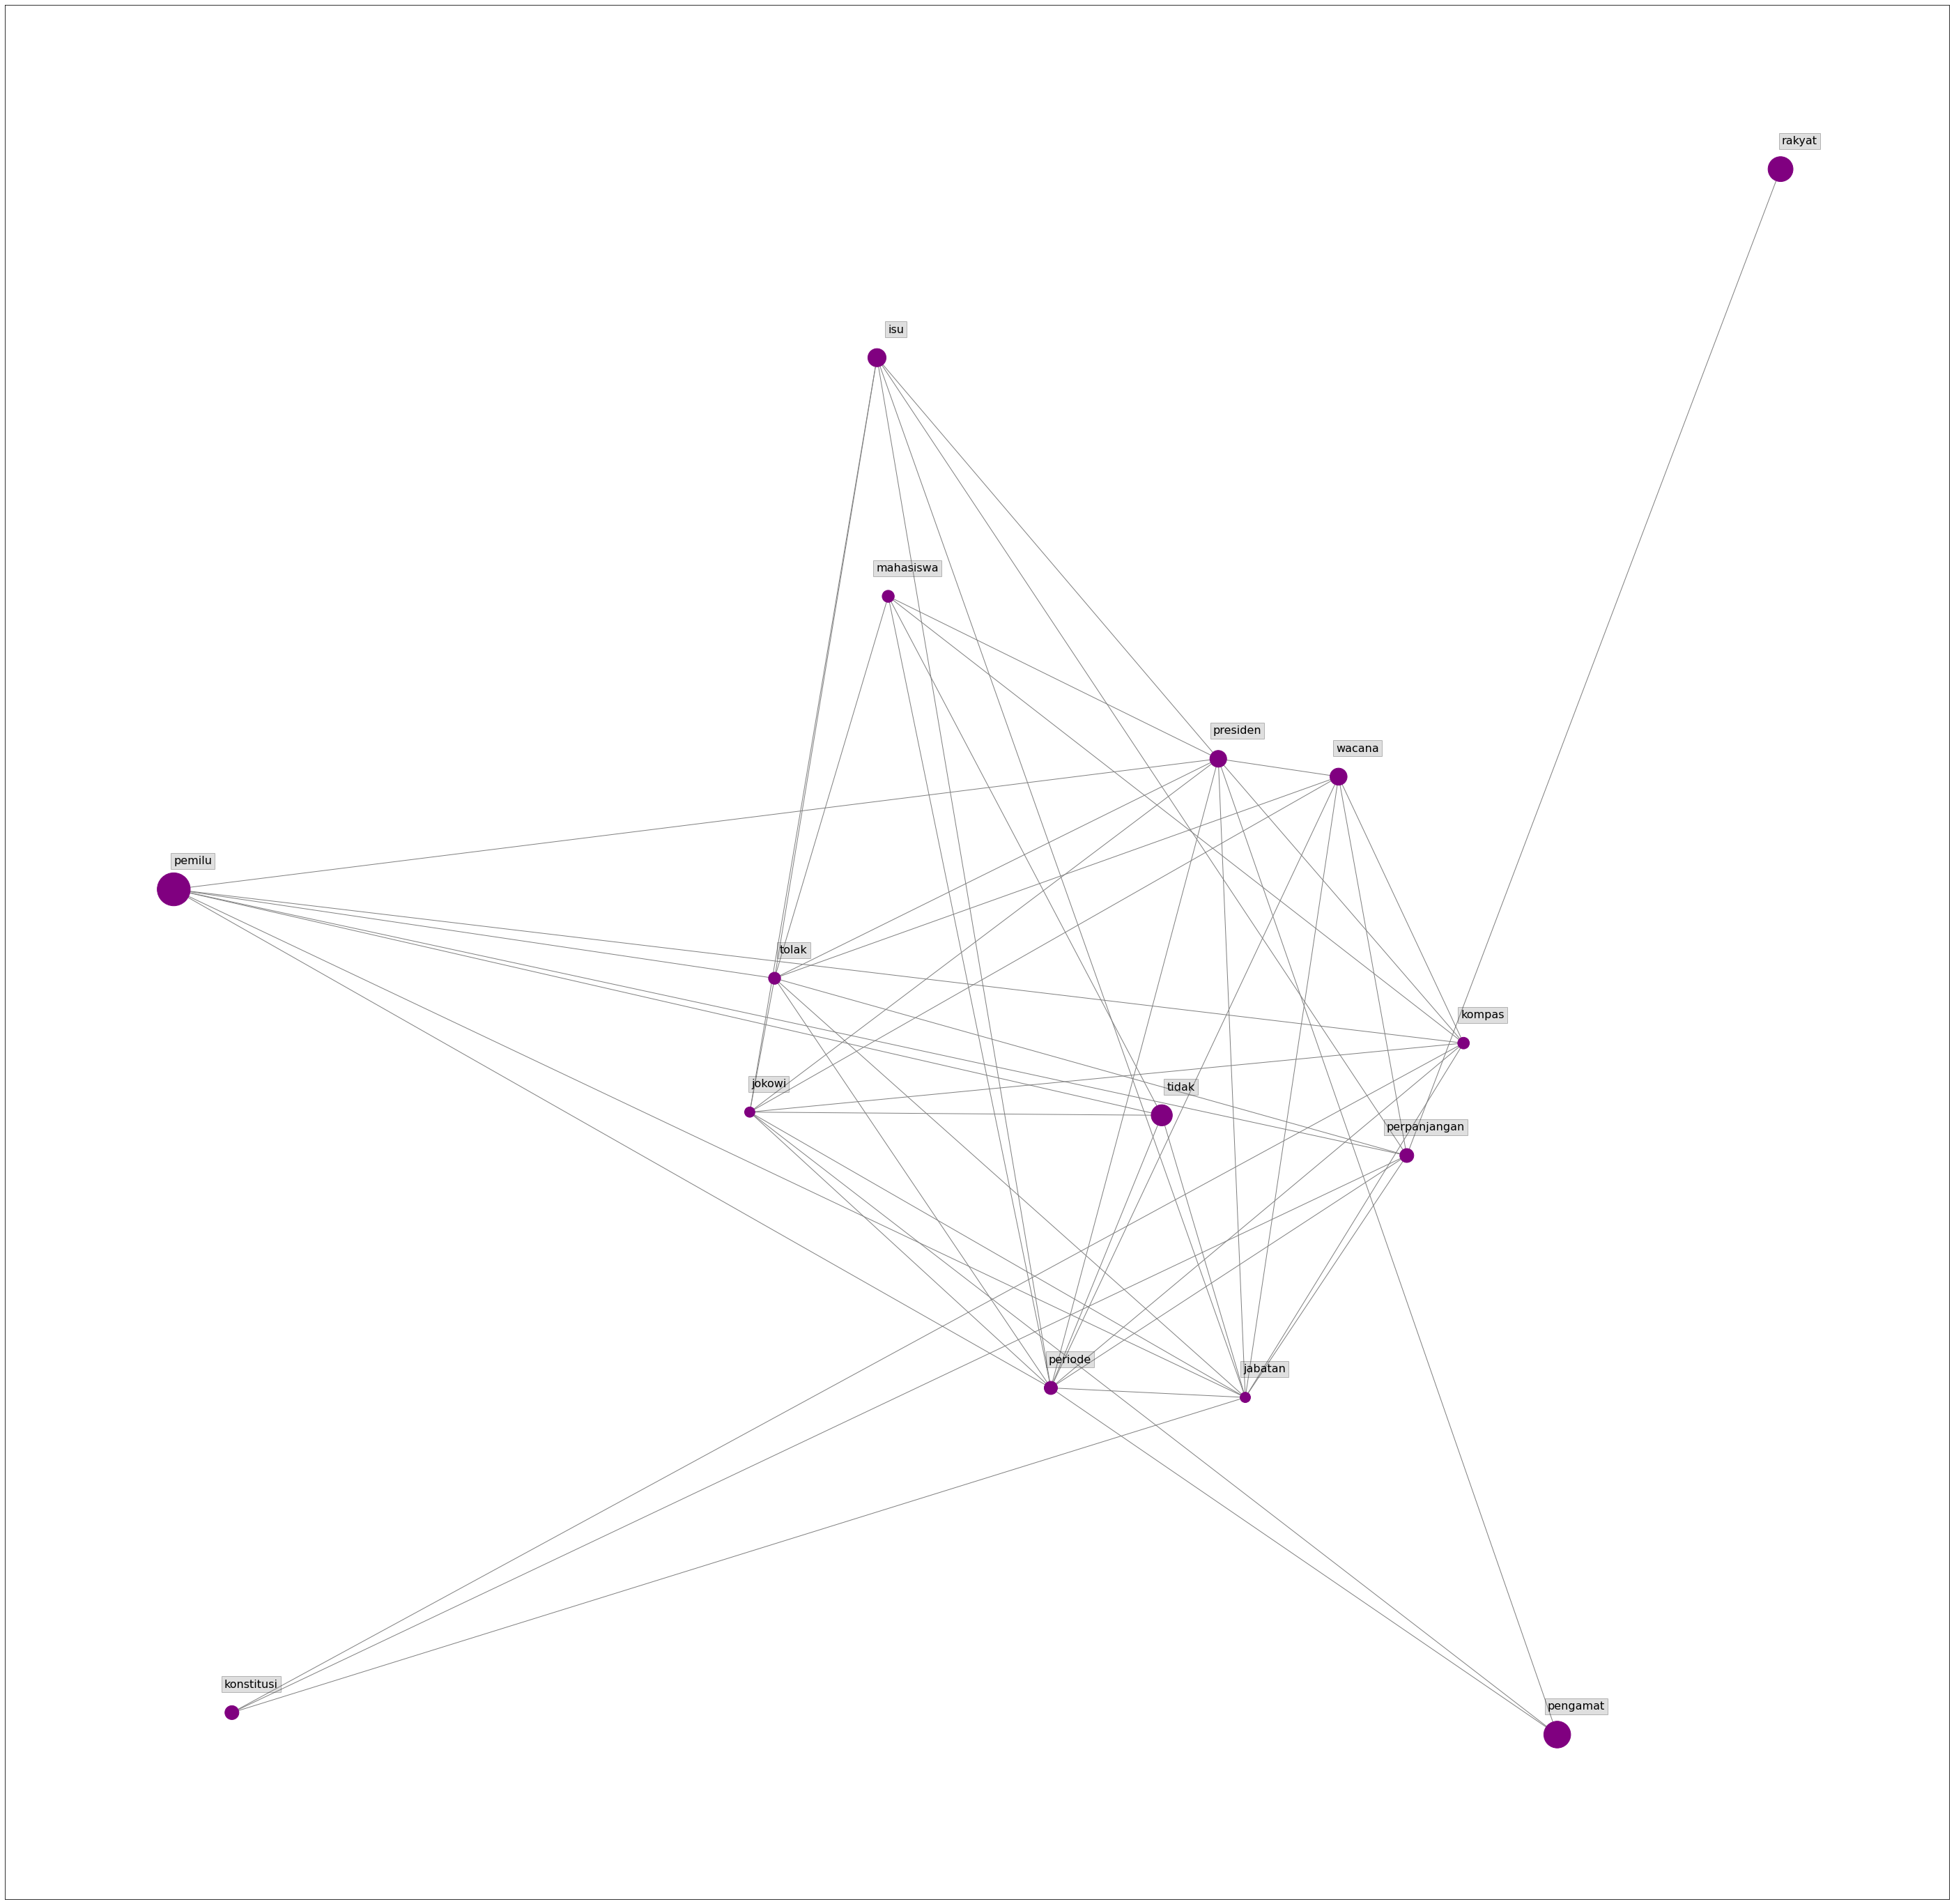

In [12]:
#Memanggil Fungsi Membuat Network Berita
df = pd.read_csv("clean_news_periodejabatan.csv")
draw_networkd(df, "clean_judul_berita")

Pada data Twiter banyak kata yang memiliki nilai edge lebih dari 10, hal ini disebabkan banyaknya data yang berhasil dikumpulkan. Dari analisis ektraksi topik, pada data twiter memberikan nilai koheren yang tinggi saat jumlah topik = 6. Artinya cukup banyak kata penting dalam data twiter. Menteri dan Partai merupakan kata yang cukup penting dalam data ini.
Pada data berita, bentuk graf tidak sekomplek pada data twiter. Kata kunci dari data judul berita selain periode jabatan adalah kata pengamat, rakyat, pemilu
